In [ ]:
%matplotlib inline
from pylab import *

In [ ]:
from deficit_defs import *

Splikes version  0.1.4
Plasticnet version  0.1.12
macOS-14.5-arm64-arm-64bit
Base Image File: asdf/bbsk081604_all_scale2.asdf


In [ ]:
base='sims/2024-05-06'

In [ ]:
def nr_jitter(blur=[-1,-1],
            noise=[0.1,0.1],
              rf_size=19,
           number_of_neurons=10,
            mu_c=0,sigma_c=0,    
            mu_r=0,sigma_r=0,
           total_time=8*day,
           save_interval=1*hour,_debug=False):

    if _debug:
        total_time=1*minute
        save_interval=1*second

        
    images=[]
    for bv in blur:
        if bv<=0:
            im=pi5.filtered_images(
                                base_image_file,
                                {'type':'dog','sd1':1,'sd2':3},
                                {'type':'norm'},
                                )
        else:
            im=pi5.filtered_images(
                                    base_image_file,
                                    {'type':'blur','size':bv},
                                    {'type':'dog','sd1':1,'sd2':3},
                                    {'type':'norm'},
                                    )
        images.append(im)
                
        
        
        
    dt=200*ms      
    eta=2e-6
    pre1=pn.neurons.natural_images_with_jitter(images[0],
                                                rf_size=rf_size,
                                                time_between_patterns=dt,
                                                sigma_r=0,
                                                sigma_c=0,
                                                verbose=False)

    pre2=pn.neurons.natural_images_with_jitter(images[1],
                                                rf_size=rf_size,
                                                other_channel=pre1,
                                                time_between_patterns=dt,
                                                mu_r=mu_r,mu_c=mu_c,
                                                sigma_r=sigma_r,sigma_c=sigma_c,
                                                verbose=False)


    pre1+=pn.neurons.process.add_noise_normal(0,noise[0])
    pre2+=pn.neurons.process.add_noise_normal(0,noise[1])

    pre=pre1+pre2

    post=default_post(number_of_neurons)
    c=default_bcm(pre,post)
    c.eta=eta

    sim=pn.simulation(total_time)
    sim.dt=dt

    if _debug:
        sim.monitor(pre,['output'],save_interval)
        
    sim.monitor(post,['output'],save_interval)
    sim.monitor(c,['weights','theta'],save_interval)

    sim+=pn.grating_response(print_time=False)

    return sim,[pre,post],[c]

In [ ]:
def run_one(params,overwrite=False,run=True,_debug=False):
    import plasticnet as pn
    count,noise1,noise2,blur1,blur2,number_of_neurons,sfname,mu_c,sigma_c,mu_r,sigma_r=(
        params.count,params.noise1,params.noise2,
        params.blur1,params.blur2,
        params.number_of_neurons,params.sfname,params.mu_c,params.sigma_c,
        params.mu_r,params.sigma_r)
    
    if not overwrite and os.path.exists(sfname):
        return sfname
    
    seq=pn.Sequence()

    t=16*day*2
    ts=1*hour
    
    t=8*day
    ts=1*hour

    # DEBUG
    if _debug:
        t=1*minute
        ts=1*second
    
    seq+=nr_jitter(blur=[blur1,blur2],
            total_time=t,
            noise=[noise1,noise2],number_of_neurons=number_of_neurons,
            mu_c=mu_c,sigma_c=sigma_c,
            mu_r=mu_r,sigma_r=sigma_r,
            save_interval=ts)

    if run:
        seq.run(display_hash=False)
        pn.save(sfname,seq) 
    
    return sfname
    

In [ ]:
seq=pn.Sequence()
seq+=nr_jitter(blur=[-1,-1],
    total_time=11,
    noise=[0,0],
    number_of_neurons=1,
    mu_c=0,sigma_c=10,
    save_interval=1,
    _debug=True
)


Using cache_images/cache_images_f6d484251bbeda8699ed0b15303a996c.asdf from cache.Using cache_images/cache_images_f6d484251bbeda8699ed0b15303a996c.asdf from cache.

In [ ]:
seq.run(display_hash=False)

[.] Sequence Time Elapsed...1.19 s


In [ ]:
sim=seq.sims[0]

In [ ]:
m=sim.monitors['output']

In [ ]:
t,X=m.arrays()

In [ ]:
X.shape

(61, 722)

In [ ]:
def mysubplot(R,C,r,c):
    from matplotlib.pyplot import subplot2grid
    subplot2grid((R, C), (r, c))

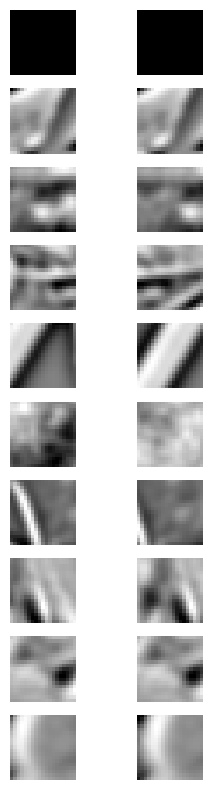

In [ ]:
figure(figsize=(3,10))
for i in range(10):
    mn,mx=min(X[i,:]),max(X[i,:])
    x1=X[i,:19*19].reshape(19,19)
    x2=X[i,19*19:].reshape(19,19)
    mysubplot(10,2,i,0)
    imshow(x1,cmap='gray',vmin=mn,vmax=mx)
    axis('off')
    mysubplot(10,2,i,1)
    imshow(x2,cmap='gray',vmin=mn,vmax=mx)
    axis('off')


In [ ]:
from collections import namedtuple
params = namedtuple('params', 
                    ['count', 'noise1','noise2',
                     'blur1','blur2','number_of_neurons',
                     'sfname','mu_c','sigma_c','mu_r','sigma_r'])
number_of_neurons=4
p=params(count=0,
         noise1=0.1,noise2=0.1,
         blur1=-1,blur2=-1,
         number_of_neurons=number_of_neurons,
         sfname=f'{base}/nr_jitter_test.asdf',
         mu_c=0,sigma_c=10,
         mu_r=0,sigma_r=10,
         )

In [ ]:
run_one(p,overwrite=True,run=True)

Using cache_images/cache_images_f6d484251bbeda8699ed0b15303a996c.asdf from cache.Using cache_images/cache_images_f6d484251bbeda8699ed0b15303a996c.asdf from cache.[.] Sequence Time Elapsed...48.87 s


'sims/2024-05-06/nr_jitter_test.asdf'

sims/2024-05-06/nr_jitter_test.asdf


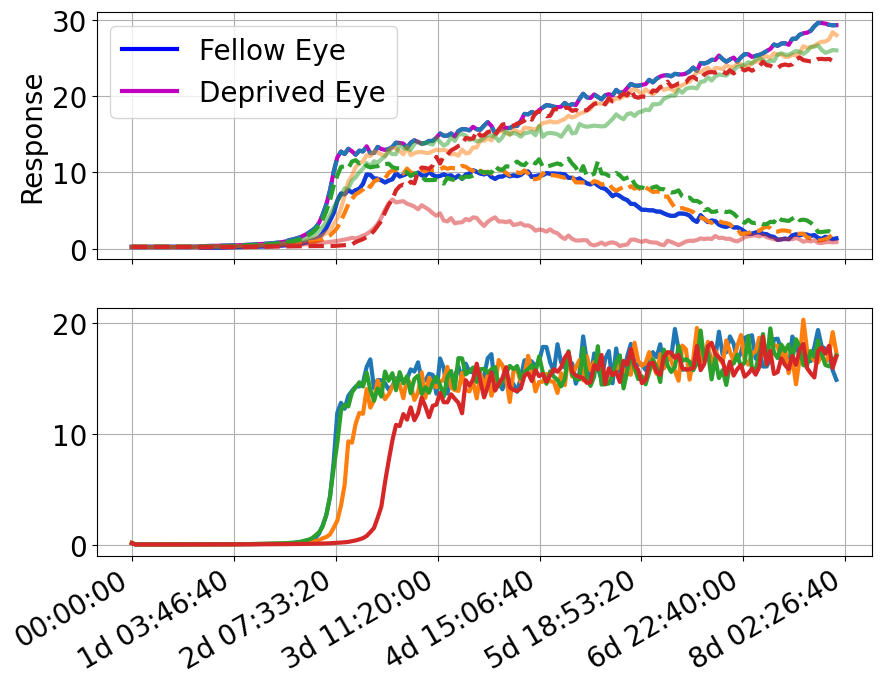

In [ ]:
colors=[_['color'] for _ in list(mpl.rcParams['axes.prop_cycle'])]
R=Results(p.sfname)
strong_i=1
weak_i=0

subplot(2,1,1)
plot(R.t,R.y[:,0,strong_i],'b',label='Fellow Eye')
plot(R.t,R.y[:,0,weak_i],'m',label='Deprived Eye')

for n in range(number_of_neurons):
    plot(R.t,R.y[:,n,0],'--',color=colors[n])
    plot(R.t,R.y[:,n,1],color=colors[n],alpha=0.5)
    
    
ylabel('Response')
legend()
print(p.sfname)
reformat_time_axis()   
        
subplot(2,1,2)
plot(R.t,R.θ)
reformat_time_axis() 

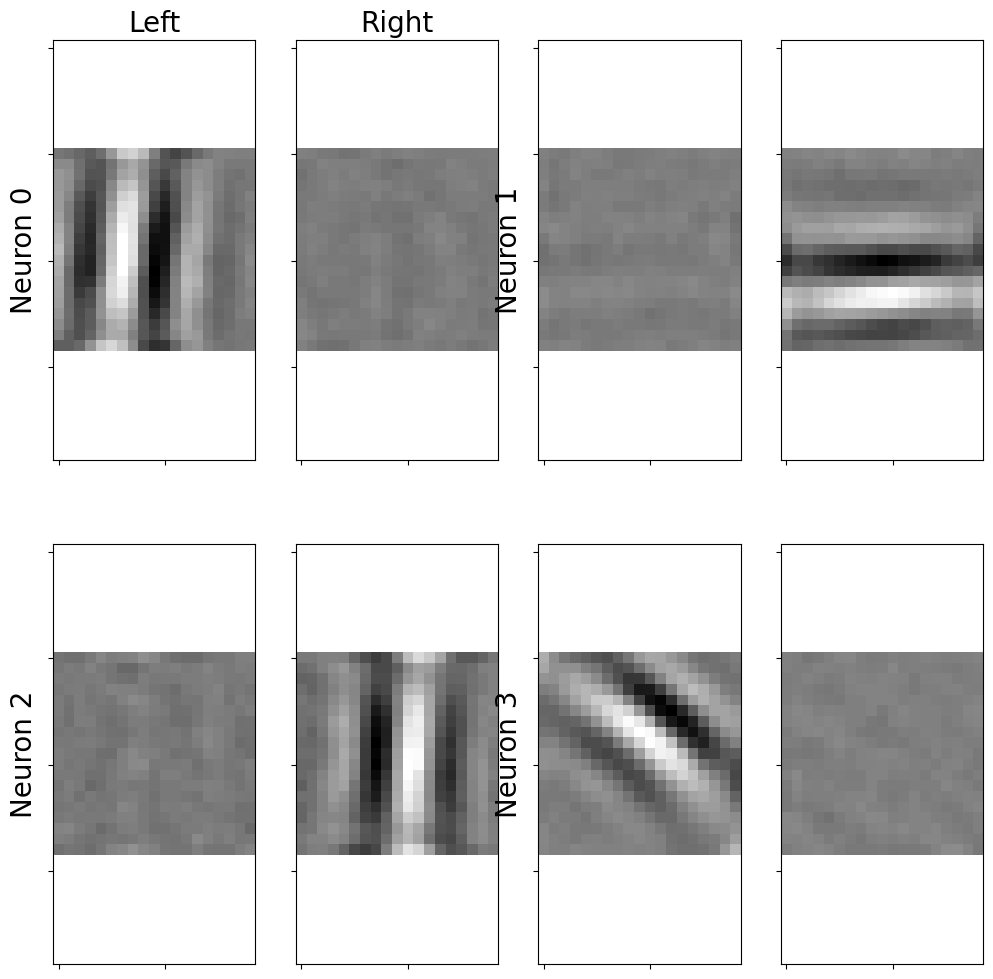

In [ ]:
R.plot_rf_grid()